In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from tensorflow.image import central_crop

In [ ]:
def load_dataset():
    with h5py.File("/content/drive/MyDrive/quark-gluon-dataset/quark-gluon_test-set_n10000.hdf5", "r") as f:
        n = 10000
        keys = list(f.keys())
        for i in keys:
            print(i, f[i].shape)
        data = {keys[0]: f[keys[0]][0:n],
                keys[1]: f[keys[1]][0:n]}

        # qg = np.asarray(f['X'][()], dtype=np.float32)
        # py = np.asarray(f['y'][()], dtype=np.float32)
        # print("Loaded photon dataset!")

    # with h5py.File("/content/drive/My Drive/electron-photon-dataset/electron.hdf5", "r") as f:
    #     ex = np.asarray(f['X'][()], dtype=np.float32)
    #     ey = np.asarray(f['y'][()], dtype=np.float32)
    #     print("Loaded electron dataset!")

    # print("Photon dataset shape:", px.shape, py.shape)
    # print("Electron dataset shape:", ex.shape, ey.shape)
    # return px,py,ex,ey
    return data

In [ ]:
data = load_dataset()

X (10000, 125, 125, 3)
y (10000,)


In [ ]:
print(data['X'].shape)
print(max(data['y']), min(data['y']))

zeros = (data['y'] == 0)
ones = (data['y'] == 1)
print(sum(ones), sum(zeros))

(10000, 125, 125, 3)
1.0 0.0
5000 5000


In [ ]:
data0 = data['X'][zeros]
data1 = data['X'][ones]
del data

In [ ]:
def crop_center(img,cropx,cropy):
    x,y = img.shape[1:3]
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[:,startx:startx+cropx,starty:starty+cropy,:]

In [ ]:
def display_data(data, label, thresh=0):
    fig = plt.figure(figsize=(12,12))
    r = 1
    c = 3
    print(label)
    for i in range(3):
        fig.add_subplot(r,c,i+1)
        if thresh:
            m = np.mean(data[:, :,:, i], axis=0).mean()
            plt.imshow(np.mean(data[:, :,:, i], axis=0) >= m)
        else:
            plt.imshow(np.log(np.mean(data[:, :,:, i], axis=0)))

Gluon
Gluon
Gluon
Gluon


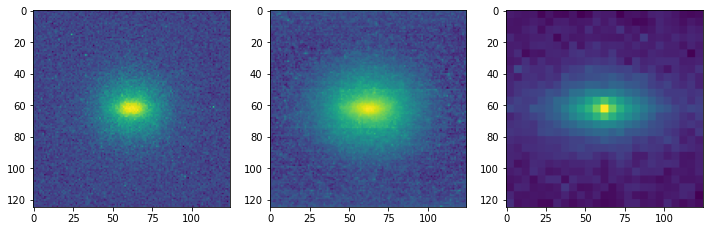

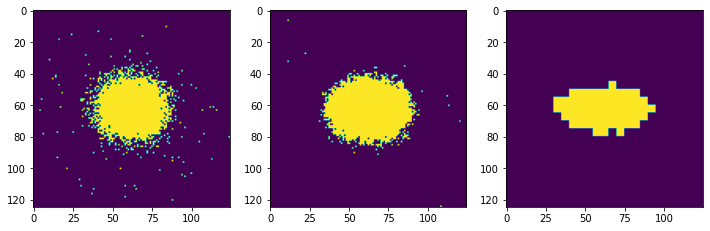

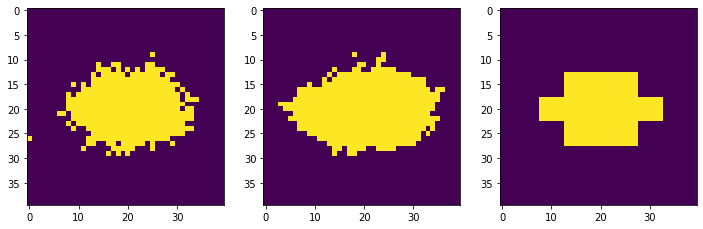

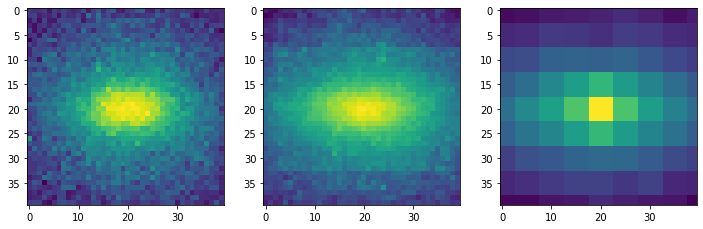

In [ ]:
display_data(data0,"Gluon")
display_data(data0,"Gluon",thresh=1)
display_data(crop_center(data0, 40, 40),"Gluon",thresh=1)
display_data(crop_center(data0, 40, 40),"Gluon")

Quark
Quark
Quark
Quark


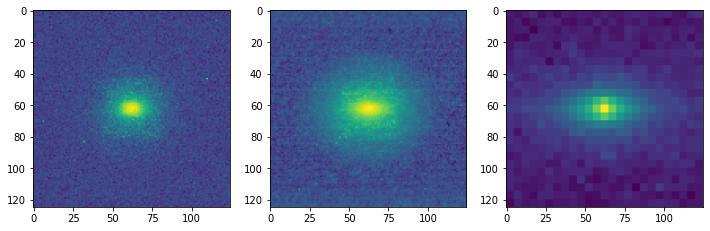

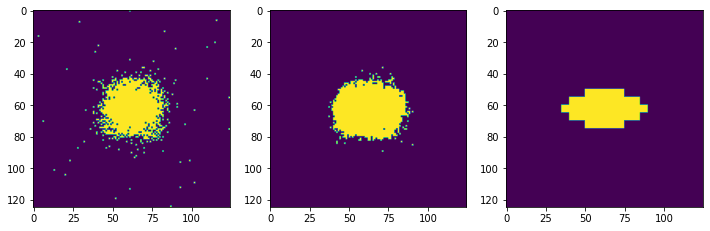

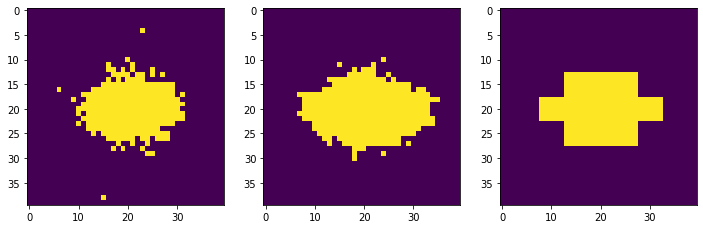

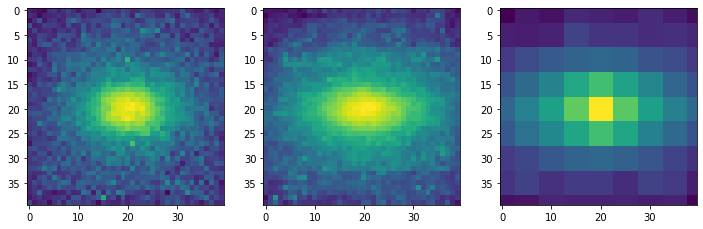

In [ ]:
display_data(data1,"Quark")
display_data(data1,"Quark",1)
display_data(crop_center(data1, 40, 40),"Quark",thresh=1)
display_data(crop_center(data1, 40, 40),"Quark")

In [ ]:
data0 = crop_center(data0, 40, 40)[:,:,:,1][..., np.newaxis]   # ECAL Channel
data1 = crop_center(data1, 40, 40)[:,:,:,1][..., np.newaxis]   # ECAL Channel

print(data0.shape, data1.shape)

(5000, 40, 40, 1) (5000, 40, 40, 1)


In [ ]:
zeros = np.array([0]*len(data0))
ones = np.array([1]*len(data1))

x = np.concatenate((data0,data1), axis =0)
y = np.concatenate((zeros,ones), axis= 0)
del data0, data1

print(x.shape, y.shape)

(10000, 40, 40, 1) (10000,)


In [ ]:
x, y = shuffle(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state=4, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(9000, 40, 40, 1) (9000,)
(1000, 40, 40, 1) (1000,)


In [ ]:
np.savez_compressed('/content/quark_gluon_med.npz', **{
    'x_train': x_train,
    'y_train':y_train,
    'x_test':x_test,
    'y_test':y_test
})

del x_train, x_test, y_train, y_test

In [ ]:
data = np.load('/content/quark_gluon_med.npz', allow_pickle=True)

In [ ]:
data['x_train'].shape

(9000, 40, 40, 1)

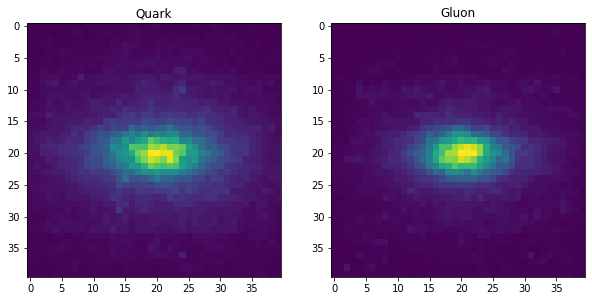

In [ ]:
fig2 = plt.figure(figsize=(10,10))
r = 1
c = 2
index = [np.where(data['y_train'] == 0)[0], np.where(data['y_train'] == 1)[0]]
for i in range(2):
    fig2.add_subplot(r,c,i+1)
    plt.imshow(np.mean(data['x_train'][index[i],:,:,0], axis=0))
    plt.title('Quark' if i == 0 else 'Gluon')